<a href="https://colab.research.google.com/github/NbtKmy/gc_workshops/blob/main/ControlNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ControlNet

>ControlNet is a neural network structure to control diffusion models by adding extra conditions, a game changer for AI Image generation. It brings unprecedented levels of control to Stable Diffusion.

(Beschreibung aus: [Offizielle Website](https://stablediffusionweb.com/ControlNet))

Kurz mit ControlNet kann man das Output von Stable Diffusion mehr kontrollieren.
Und das erregte grosse Aufsehen 2022. Warum? Das sehen wir hier unten!


Weiterführende Seiten:
- Github-Repo [lllyasviel/ControlNet](https://github.com/lllyasviel/ControlNet/tree/main)
- [controlnet-aus für pip](https://pypi.org/project/controlnet-aux/)
- [Notebook von ???](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/controlnet.ipynb#scrollTo=K-3yzE7GoC5l)


In [ ]:
!pip install -q diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00


In [ ]:
!pip install -q opencv-contrib-python
!pip install -q controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.9/261.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.6 MB/s eta 0:00:00


## Canny edge detection und Pose-Detection mit ControlNet


Zuerst sehen wir, was ControlNet

In [ ]:
import requests
from PIL import Image
from io import BytesIO

from controlnet_aux.processor import Processor


def controlnet_output(img, processor_name):
    processor = Processor(processor_name)
    processed_image = processor(img, to_pil=True)

    return processed_image

# Beispiel Bild auf Huggingface herunterladen
# url = "https://huggingface.co/lllyasviel/sd-controlnet-openpose/resolve/main/images/pose.png"
# response = requests.get(url)
# img = Image.open(BytesIO(response.content)).convert("RGB").resize((512, 512))

# Wenn man eigenes Bild verwenden möchte -
img2 = Image.open("degas_bsp_test.jpg").convert("RGB").resize((512, 512))


# Mögliche Optionen für Prozessor:
# ["canny", "depth_leres", "depth_leres++", "depth_midas", "depth_zoe", "lineart_anime",
#  "lineart_coarse", "lineart_realistic", "mediapipe_face", "mlsd", "normal_bae", "normal_midas",
#  "openpose", "openpose_face", "openpose_faceonly", "openpose_full", "openpose_hand",
#  "scribble_hed, "scribble_pidinet", "shuffle", "softedge_hed", "softedge_hedsafe",
#  "softedge_pidinet", "softedge_pidsafe"]


processed_image = controlnet_output(img2, "openpose_full")
processed_image2 = controlnet_output(img2, "canny")

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


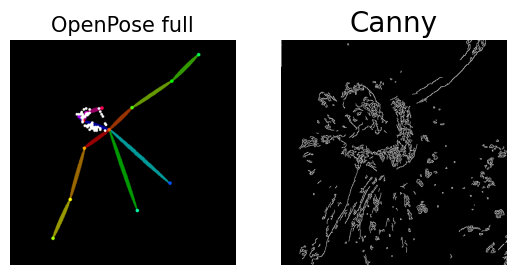

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()

X = 1
Y = 2

imgplot = 1
ax1 = fig.add_subplot(X, Y, imgplot)
ax1.tick_params(labelbottom="off",bottom="off")
ax1.tick_params(labelleft="off",left="off")
ax1.set_xticklabels([])
ax1.axis("off")
ax1.set_title("OpenPose full",fontsize=15)
plt.imshow(processed_image)

img2plot = 2
ax2 = fig.add_subplot(X, Y, img2plot)
ax2.tick_params(labelbottom="off",bottom="off")
ax2.tick_params(labelleft="off",left="off")
ax2.set_xticklabels([])
ax2.axis("off")
ax2.set_title("Canny",fontsize=20)
plt.imshow(processed_image2)





## Stable Diffusion mit ControlNet

Im Folgenden probieren wir die Kombination von Stable Diffusion und ControlNet aus.

Es sind mehrere ControlNet-Modells, die man in diesem Verfahren einsetzen kann. [Hier](https://huggingface.co/docs/diffusers/v0.16.0/en/api/pipelines/stable_diffusion/controlnet#controlnet-v10) sind die Liste der Modells.
Es gibt momentan die Modells von ControlNet v1.0 und ControlNet v1.1.

### OpenPose

[OpenPose]()

Es gibt auch die Sammlung der detected Pose:
https://openposes.com/



/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

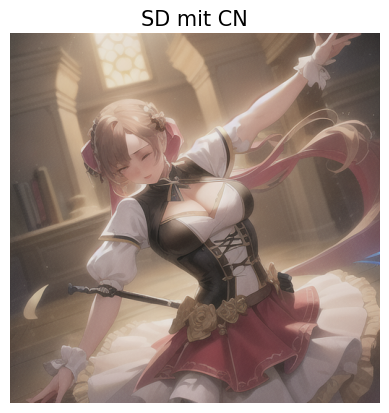

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from controlnet_aux import OpenposeDetector
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# GPU
device = "cuda:0"

# Pose detection
pose_detector = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
pose_detected = pose_detector(Image.open("degas_bsp_test.jpg"))

# ControlNet Modell holen
controlnet = ControlNetModel.from_pretrained(
        "lllyasviel/sd-controlnet-openpose",
        torch_dtype=torch.float16
        )


pipe = StableDiffusionControlNetPipeline.from_pretrained(
            "xyn-ai/anything-v4.0", controlnet=controlnet, torch_dtype=torch.float16
        )

# Prozess beschleunigen und zugleich Memory verschonen
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
#
pipe.enable_xformers_memory_efficient_attention()
# Die Belastung des Memorys reduzieren
pipe.enable_model_cpu_offload()


generator = torch.Generator(device)
prompt = "1girl, dancing, masterpiece, best quality, extremely detailed, 4K, illustration"
negative_prompt = "low quality, worst quality, bad fingers, bad face, extra arms, extra legs"

generator.manual_seed(0)
image = pipe(prompt, pose_detected, negative_prompt=negative_prompt, generator=generator,
                     num_inference_steps=50).images[0]



plt.plot()
ax = plt.subplot(111)
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis("off")
ax.set_title("SD mit CN",fontsize=15)
plt.imshow(image)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

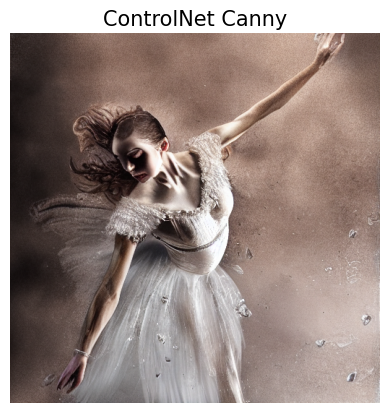

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from controlnet_aux import CannyDetector
import torch
from PIL import Image
import matplotlib.pyplot as plt


device = "cuda:0"

canny = CannyDetector()
canny_img = canny(Image.open("degas_bsp_test.jpg"))

controlnet = ControlNetModel.from_pretrained(
        "lllyasviel/sd-controlnet-canny",
        torch_dtype=torch.float16
        )

pipe = StableDiffusionControlNetPipeline.from_pretrained(
            "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
        )

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
pipe.enable_model_cpu_offload()

generator = torch.Generator(device)
prompt = "a ballet dancer, masterpiece, best quality, extremely detailed, 4K, illustration"

generator.manual_seed(0)
image = pipe(prompt, canny_img, generator=generator,
                     num_inference_steps=50).images[0]



plt.plot()
ax = plt.subplot(111)
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis("off")
ax.set_title("ControlNet Canny",fontsize=15)
plt.imshow(image)
